In [3]:
from google.colab import files
uploaded = files.upload()

Saving books.csv to books.csv


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import pandas as pd

In [5]:
import pandas as pd

# Load the dataset
data = pd.read_csv('books.csv')

# Data preprocessing (convert titles to lowercase)
data['title'] = data['title'].str.lower()

# Create a DataFrame to store non-duplicate book titles
deduplicated_data = data.drop_duplicates(subset='title', keep='first')

# Save or use the deduplicated data
deduplicated_data.to_csv('deduplicated_book_dataset.csv', index=False)

In [6]:
# Choose the entity of interest
entity_of_interest = "Charlotte's Web"
entity_of_interest2 = "The Lord of the Rings"
entity_of_interest3 = "Oh, the Places You'll Go!"

In [7]:
# Load the dataset
data = pd.read_csv('deduplicated_book_dataset.csv')

# Preprocess the data, filling NaN values with empty strings
data['description'].fillna('', inplace=True)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the descriptions
tfidf_matrix = tfidf_vectorizer.fit_transform(data['description'])

In [8]:
data.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,spider's web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,the one tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,the four loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [13]:
# Calculate the cosine similarity between the entity of interest and all other entities
cosine_sim = linear_kernel(tfidf_vectorizer.transform([entity_of_interest]), tfidf_matrix)

# Get the indices of the 10 most similar entities
similar_indices = cosine_sim.argsort()[0][-11:-1]  # Excluding the entity of interest itself

# Get the titles of the most similar entities
similar_entities = data.iloc[similar_indices]['title'].tolist()

similar_books = []
print(f"The 10 most similar entities to '{entity_of_interest}' are:")
for i, entity in enumerate(similar_entities, start=1):
    print(f"{i}. {entity}")
    similar_books.append(entity)

The 10 most similar entities to 'Charlotte's Web' are:
1. the non-designer's web book
2. agile web development with rails
3. the best american travel writing 2006
4. last man standing
5. php and mysql for dummies
6. charlotte's web signature edition
7. charlotte's web (full color)
8. i am charlotte simmons
9. charlotte's web: wilbur finds a friend
10. css cookbook


In [14]:
# Calculate the cosine similarity between the entity of interest 2 and all other entities
cosine_sim = linear_kernel(tfidf_vectorizer.transform([entity_of_interest2]), tfidf_matrix)

# Get the indices of the 10 most similar entities
similar_indices = cosine_sim.argsort()[0][-11:-1]  # Excluding the entity of interest itself

# Get the titles of the most similar entities
similar_entities = data.iloc[similar_indices]['title'].tolist()

similar_books_2 = []
print(f"The 10 most similar entities to '{entity_of_interest2}' are:")
for i, entity in enumerate(similar_entities, start=1):
    print(f"{i}. {entity}")
    similar_books_2.append(entity)

The 10 most similar entities to 'The Lord of the Rings' are:
1. the lord of the rings sketchbook
2. the lord of the rings complete visual companion
3. 五輪書 : 英文版
4. the return of the king
5. the tolkien reader
6. j.r.r. tolkien
7. the tolkien companion
8. bored of the rings
9. the hobbit / the lord of the rings
10. the history of the lord of the rings


In [15]:
# Calculate the cosine similarity between the entity of interest 3 and all other entities
cosine_sim = linear_kernel(tfidf_vectorizer.transform([entity_of_interest3]), tfidf_matrix)

# Get the indices of the 10 most similar entities
similar_indices = cosine_sim.argsort()[0][-11:-1]  # Excluding the entity of interest itself

# Get the titles of the most similar entities
similar_entities = data.iloc[similar_indices]['title'].tolist()

similar_books_3 = []
print(f"The 10 most similar entities to '{entity_of_interest3}' are:")
for i, entity in enumerate(similar_entities, start=1):
    print(f"{i}. {entity}")
    similar_books_3.append(entity)

The 10 most similar entities to 'Oh, the Places You'll Go!' are:
1. he's just not that into you (the newly expanded edition)
2. cliffsnotes on euripides' medea & electra
3. unlimited power
4. new york city's best dive bars
5. behind closed doors
6. ten days to self-esteem
7. the great good place
8. simply beautiful beaded jewelry
9. the purpose of your life
10. the power of infinite love & gratitude


In [17]:
# put top 10 similar books for each book into datasets
df_query1 = data[data['title'].isin(similar_books)]
df_query2 = data[data['title'].isin(similar_books_2)]
df_query3 = data[data['title'].isin(similar_books_3)]

# look up the average rating for books in each dataframe and calculate the mean
avg_rating_1 = df_query1['average_rating'].mean()
avg_rating_2 = df_query2['average_rating'].mean()
avg_rating_3 = df_query3['average_rating'].mean()


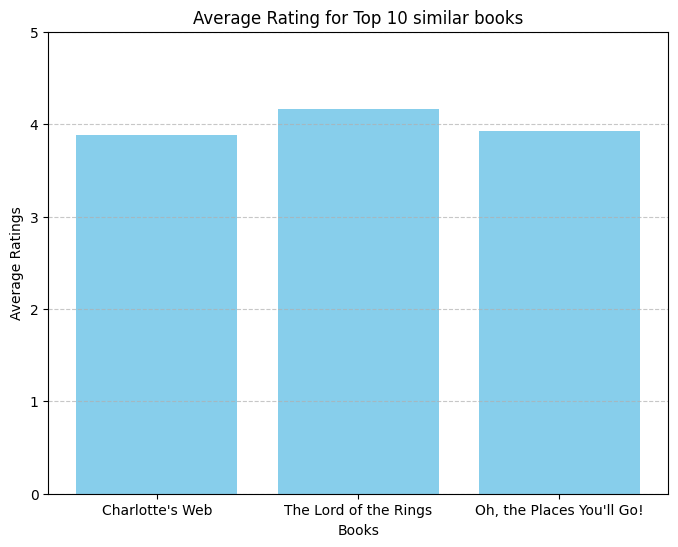

In [21]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
queries = ["Charlotte's Web", "The Lord of the Rings", "Oh, the Places You'll Go!"]

# Create a bar chart
average_ratings = [avg_rating_1, avg_rating_2, avg_rating_3]

# Create a bar graph
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.bar(queries, average_ratings, color='skyblue')
plt.xlabel('Books')
plt.ylabel('Average Ratings')
plt.title('Average Rating for Top 10 similar books')
plt.ylim(0, 5)  # Set the y-axis range (adjust as needed)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
